<a href="https://colab.research.google.com/github/PHYS486-S22/PHYS486-S22/blob/main/SampleNotebooks/Boltzmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
from numpy.random import rand, randint
import matplotlib.pyplot as plt

In [2]:
def calcEnergy(n):
    
  #simple hydrogen atom energy level
  energy = -13.6 / (n*n) # in eV

  return energy    

In [3]:
print(calcEnergy(20))

-0.034


In [4]:
def probEnergy(n,T):

  #calculate the energy of the state
  energy = calcEnergy(n)

  #calculate kT
  k = 8.617342315e-5 #eV/Kelvin
  kT = k*T

  #calculate probability (unnormalized!)
  prob = np.exp(-1.*energy/kT)

  return prob

In [5]:
print(probEnergy(1,10))

inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


In [6]:
def relativeProb(n1,n2,T):

  #calculate the energies of the states n1 & n2
  n1energy = calcEnergy(n1)
  n2energy = calcEnergy(n2)

  #calculate kT
  k = 8.617342315e-5 #eV/Kelvin
  kT = k*T

  #calculate relative probabilities of states n1 and n2
  prob_n2_over_n1 = (n2*n2/(n1*n1))*np.exp(-1.*(n2energy - n1energy)/kT)

  return prob_n2_over_n1

In [7]:
print(calcEnergy(1))
print(calcEnergy(2))
print(relativeProb(1,2,100000))

-13.6
-3.4
1.2246250998327632


In [8]:
# calculate the sum of the probabilities we'd be normalizing over as a function of the number of levels we consider

exploreTemp = 10000.

for i in range(10):
  totalProb = 0.
  for j in range(i):
    totalProb = totalProb + relativeProb(1,j+2,exploreTemp)
  print(i, totalProb)

0 0.0
1 2.8939541267577195e-05
2 3.621259940555731e-05
3 4.221616896409453e-05
4 4.879293696837019e-05
5 5.660206942931724e-05
6 6.60641002712594e-05
7 7.752408440505018e-05
8 9.12965690342945e-05
9 0.00010768169482092463


In [9]:
def HydrogenWalk(steps, ceiling, temp):

  #set up an array to save our ns in each step.
  n = np.zeros(steps)

  #set up the atom in the ground state
  n[0] = 1

  for i in range(steps-1):
    n[i+1] = HydrogenStep(n[i], ceiling, temp)

  return n

In [10]:
def HydrogenStep(n, ceiling, temp):

  #randomly select a level to check if the atom will transition into it.
  next_level = randint(1,ceiling)

  #calculate the probability of making this switch
  switch_chance = relativeProb(n, next_level, temp)/(1.+relativeProb(n, next_level, temp))

  #randomly select a floating point value between 0 and 1
  check = rand()

  #decide if we make the switch
  if (check < switch_chance):
    end = next_level
  else:
    end = n

  return end

1.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


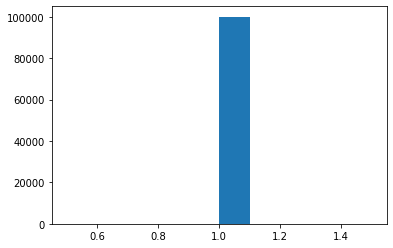

In [11]:
hydrogenCold = HydrogenWalk(100000, 100, 10.)
print(np.mean(hydrogenCold))
print(hydrogenCold[0:100])
plt.hist(hydrogenCold)
plt.show()

In [12]:
def findLevelFrac(nSought, levelArray):
  
  #search for elements in levelArray with value == nSought
  in_state = np.nonzero(levelArray == nSought)

  #calculate the number and fraction of the array in this state
  absolute_in_state = len(in_state[0])
  fraction_in_state = absolute_in_state / len(levelArray)

  return fraction_in_state, absolute_in_state

1.0
1.0 100000
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


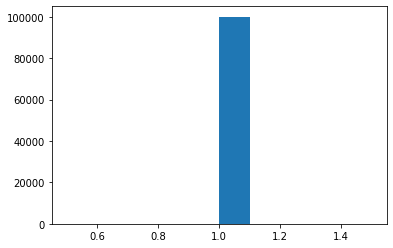

In [14]:
hydrogenCold = HydrogenWalk(100000, 100, 10.)
coldFraction, coldAbsolute = findLevelFrac(1, hydrogenCold)
print(np.mean(hydrogenCold))
print(coldFraction, coldAbsolute)
print(hydrogenCold[0:100])
plt.hist(hydrogenCold)
plt.show()

39.59631
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. 68. 96. 96. 96. 59. 70. 70.
 42. 88. 88. 88. 88. 88. 88. 88. 90. 90. 92. 92. 92. 92. 92. 92. 92. 92.
 92. 92. 84. 84. 84. 61. 61. 58. 58. 54.]


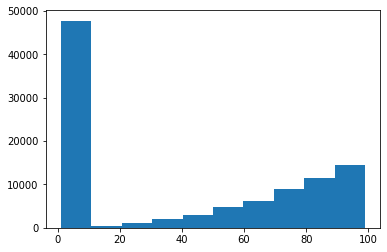

In [15]:
hydrogenHot = HydrogenWalk(100000, 100, 12500.)
print(np.mean(hydrogenHot))
print(hydrogenHot[0:100])
plt.hist(hydrogenHot)
plt.show()

39.07469
0.00017 17
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. 75. 75. 75. 75. 75. 75.
 75. 75. 75. 28. 58. 58. 58. 58. 82. 82. 82. 79. 79. 79. 79. 79. 79. 79.
 79. 49. 44. 44. 44. 13. 93. 93. 93. 19. 73. 73. 73. 79. 79. 54. 54. 93.
 93. 99. 99. 99. 99. 65. 95. 95. 95. 95. 95. 95. 95.  1.  1.  1.  1.  1.
  1.  1.  1.  1. 71. 82. 82. 82. 82. 82. 82. 82. 46. 46. 46. 86. 86. 86.
 55. 51. 51. 51. 51. 91. 97. 97. 97. 97.]


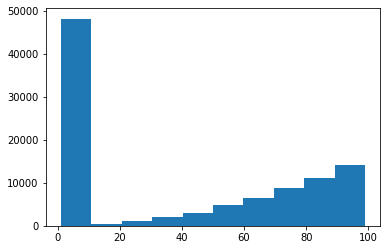

In [17]:
hydrogenHot = HydrogenWalk(100000, 100, 12500.)
hotFraction, hotAbsolute = findLevelFrac(2, hydrogenHot)
print(np.mean(hydrogenHot))
print(hotFraction, hotAbsolute)
print(hydrogenHot[0:100])
plt.hist(hydrogenHot)
plt.show()